<a href="https://colab.research.google.com/github/Machocho254/MchezoPesa-Week-6-IP/blob/master/Moringa_DS_CORE_WEEK6_IP_January_2020_Machocho_Mengo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question.
Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly - using five features i.e Home team, Away team, Tournament type, Rank of home team and Rank of away team


---

### Approach 1: Using Polynomial regression.
Create a model that can predict how many goals the home team scores 


### Approach 2: Using Logistic Regression.
Create a model that can predict whether the home team will win, draw or lose

## Metric for Success
For Polynomial regression, the Root Mean Squared Error will be used to measure the performace of the model.
The predictive power of the logistic regression model will be measured using the accuracy score and the f1_score

## **Reading and Previewing the datasets**

In [0]:
# Importing libraries

# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

# for regression analysis
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix


import requests
from io import StringIO
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [126]:
# Loading the data the fifa ranking dataset into a pandas dataframe
# Previewing the first five rows of the dataset
#
# fifa_ranking_dataset_url = 'https://drive.google.com/file/d/1sMiLf1tsXVb4jbgKaHgSjZ6Js0ev7dIf/view?usp=sharing'

ranking = pd.read_csv('/content/fifa_ranking.csv')
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [127]:
# Previewing some information of the fifa ranking dataset
#
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [128]:
# Previewing some statistical summaries of the fifa ranking dataset
#
ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [129]:
# Checking for missing values of the fifa ranking dataset
#
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [130]:
# Checking for duplicates
#
ranking.duplicated().any()

True

In [0]:
# Removing duplicates

ranking.drop_duplicates(keep='first', inplace = True)

In [132]:
# Checking whether the duplicates have been removed
#
ranking.duplicated().any()

False

In [133]:
# Loading the results dataset into a pandas dataframe
# Previewing the first five rows of the dataset
#

# results_dataset_url = 'https://drive.google.com/file/d/1ta3oG4bTsqM1GVgTuq0ElRaLJHb1oZRl/view?usp=sharing'

results = pd.read_csv('/content/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [134]:
# Previewing some information of the results dataset
#
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [135]:
# Previewing some statistical summaries of the results dataset
#
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [136]:
# Checking for missing values of the results dataset
#
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [137]:
# Checking for duplicates
#
results.duplicated().any()

False

### **Changing dates to Datetime objects**


In [138]:
ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [139]:
# Renaming the rank_date column
#
ranking.rank_date = ranking.rename({'rank_date': 'date'}, axis = 1, inplace = True)
ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
date                        object
dtype: object

In [140]:
# Making the date columns uniform
#
results.date = results.date.apply(lambda x: x.replace('-', '/'))
results.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872/11/30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873/03/08,England,Scotland,4,2,Friendly,London,England,False
2,1874/03/07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875/03/06,England,Scotland,2,2,Friendly,London,England,False
4,1876/03/04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
# Changing the date columns to datetime objects
#
ranking.date = pd.to_datetime(ranking.date)
results.date = pd.to_datetime(results.date)

# Creating a year and month column from the datetime object
#
ranking['year'] = ranking.date.dt.year
results['year'] = results.date.dt.year

ranking['month'] = ranking.date.dt.month
results['month'] = ranking.date.dt.month

In [142]:
# Checking the unique years in the ranking dataset
#
ranking.year.unique()


array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [143]:
# Checking the unique years in the results dataset
#
results.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [144]:
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [145]:
# drop unnecessary columns from the ranks column

new_ranks = ranking.drop(['confederation', 'three_year_ago_weighted', 'three_year_ago_avg', 'two_year_ago_weighted', 'two_year_ago_avg', 'last_year_avg_weighted', 'last_year_avg', 'cur_year_avg_weighted', 'cur_year_avg', 'country_abrv'], axis=1) 
new_ranks

,rank,country_full,total_points,previous_points,rank_change,date,year,month
0,1,Germany,0.0,57,0,1993-08-08,1993,8
1,2,Italy,0.0,57,0,1993-08-08,1993,8
2,3,Switzerland,0.0,50,9,1993-08-08,1993,8
3,4,Sweden,0.0,55,0,1993-08-08,1993,8
4,5,Argentina,0.0,51,5,1993-08-08,1993,8
...,...,...,...,...,...,...,...,...
57788,206,Anguilla,0.0,0,1,2018-06-07,2018,6
57789,206,Bahamas,0.0,0,1,2018-06-07,2018,6
57790,206,Eritrea,0.0,0,1,2018-06-07,2018,6
57791,206,Somalia,0.0,0,1,2018-06-07,2018,6


In [146]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,8
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,8
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,8
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,8
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,8


### **MERGING DATAFRAMES AND FEATURE ENGINEERING**

In [147]:
# previewing the first observations of the datasets to be merged 
# new_ranks
new_ranks.head()

,rank,country_full,total_points,previous_points,rank_change,date,year,month
0,1,Germany,0.0,57,0,1993-08-08,1993,8
1,2,Italy,0.0,57,0,1993-08-08,1993,8
2,3,Switzerland,0.0,50,9,1993-08-08,1993,8
3,4,Sweden,0.0,55,0,1993-08-08,1993,8
4,5,Argentina,0.0,51,5,1993-08-08,1993,8


In [148]:
# first observations of the results dataset 
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,8
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,8
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,8
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,8
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,8


In [149]:
# merging the two dataset using the outer join 

merged_df = new_ranks.merge(results, how='outer')
merged_df.head()

# the outtput is a dataste of the 

,rank,country_full,total_points,previous_points,rank_change,date,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1.0,Germany,0.0,57.0,0.0,1993-08-08,1993,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Italy,0.0,57.0,0.0,1993-08-08,1993,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Switzerland,0.0,50.0,9.0,1993-08-08,1993,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sweden,0.0,55.0,0.0,1993-08-08,1993,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Argentina,0.0,51.0,5.0,1993-08-08,1993,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
# getting ranks for the home teams data
home_df = merged_df[merged_df.home_team == merged_df.country_full]
home_df.head()



,rank,country_full,total_points,previous_points,rank_change,date,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1370,15.0,England,0.0,51.0,1.0,1994-05-17,1994,5,England,Greece,5.0,0.0,Friendly,London,England,False
1395,27.0,Poland,0.0,44.0,1.0,1994-05-17,1994,5,Poland,Austria,3.0,4.0,Friendly,Katowice,Poland,False
9836,1.0,Brazil,0.0,73.0,0.0,1998-11-18,1998,11,Brazil,Russia,5.0,1.0,Friendly,Fortaleza,Brazil,False
9873,3.0,Germany,0.0,67.0,0.0,1998-11-18,1998,11,Germany,Netherlands,1.0,1.0,Friendly,Gelsenkirchen,Germany,False
9956,8.0,Italy,0.0,65.0,-2.0,1998-11-18,1998,11,Italy,Spain,2.0,2.0,Friendly,Salerno,Italy,False


In [151]:
# getting ranks for away teams data

away_df = merged_df[merged_df.away_team == merged_df.country_full]
away_df.head()

,rank,country_full,total_points,previous_points,rank_change,date,year,month,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1404,32.0,Greece,0.0,37.0,5.0,1994-05-17,1994,5,England,Greece,5.0,0.0,Friendly,London,England,False
1423,41.0,Austria,0.0,38.0,-5.0,1994-05-17,1994,5,Poland,Austria,3.0,4.0,Friendly,Katowice,Poland,False
6586,22.0,Zambia,0.0,51.0,-2.0,1997-04-09,1997,4,DR Congo,Zambia,2.0,2.0,FIFA World Cup qualification,Harare,Zimbabwe,True
9919,6.0,Czech Republic,0.0,64.0,1.0,1998-11-18,1998,11,England,Czech Republic,2.0,0.0,Friendly,London,England,False
9969,9.0,Netherlands,0.0,62.0,0.0,1998-11-18,1998,11,Germany,Netherlands,1.0,1.0,Friendly,Gelsenkirchen,Germany,False


In [152]:
# Renaming the selected home ranks_df using a for loop
# to tag the home teams data with "_home" for merging later. 

for x, y in zip(home_df.columns[:4], home_df.columns[:4]):
  home_df.rename(columns = {x: y + '_home'}, inplace = True)
  
# Previewing the renamed columns
home_df.columns

Index(['rank_home', 'country_full_home', 'total_points_home',
       'previous_points_home', 'rank_change', 'date', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral'],
      dtype='object')

In [153]:
# Renaming the selected away_df columns using a for loop
# to tag the away teams data with "_away"
for x, y in zip(away_df.columns[:4], away_df.columns[:4]):
  away_df.rename(columns = {x: y + '_away'}, inplace = True)
  
# Previewing the renamed columns
away_df.columns

Index(['rank_away', 'country_full_away', 'total_points_away',
       'previous_points_away', 'rank_change', 'date', 'year', 'month',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral'],
      dtype='object')

In [154]:
# Merging the home_df dataframe to the away_df dataframe 
# The two dataframes have been merged on year, month, home_team and away_team columns
#
final_df = pd.merge(home_df, away_df, how = 'left' , left_on =['year', 'month', 'home_team', 'away_team'],\
                    right_on = ['year', 'month', 'home_team', 'away_team'])

final_df.head()

,rank_home,country_full_home,total_points_home,previous_points_home,rank_change_x,date_x,year,month,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,rank_away,country_full_away,total_points_away,previous_points_away,rank_change_y,date_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y
0,15.0,England,0.0,51.0,1.0,1994-05-17,1994,5,England,Greece,5.0,0.0,Friendly,London,England,False,32.0,Greece,0.0,37.0,5.0,1994-05-17,5.0,0.0,Friendly,London,England,False
1,27.0,Poland,0.0,44.0,1.0,1994-05-17,1994,5,Poland,Austria,3.0,4.0,Friendly,Katowice,Poland,False,41.0,Austria,0.0,38.0,-5.0,1994-05-17,3.0,4.0,Friendly,Katowice,Poland,False
2,1.0,Brazil,0.0,73.0,0.0,1998-11-18,1998,11,Brazil,Russia,5.0,1.0,Friendly,Fortaleza,Brazil,False,37.0,Russia,0.0,49.0,-2.0,1998-11-18,5.0,1.0,Friendly,Fortaleza,Brazil,False
3,3.0,Germany,0.0,67.0,0.0,1998-11-18,1998,11,Germany,Netherlands,1.0,1.0,Friendly,Gelsenkirchen,Germany,False,9.0,Netherlands,0.0,62.0,0.0,1998-11-18,1.0,1.0,Friendly,Gelsenkirchen,Germany,False
4,8.0,Italy,0.0,65.0,-2.0,1998-11-18,1998,11,Italy,Spain,2.0,2.0,Friendly,Salerno,Italy,False,15.0,Spain,0.0,58.0,1.0,1998-11-18,2.0,2.0,Friendly,Salerno,Italy,False


In [0]:
# dropping irrelevant columns from the final dataframe

cols = ['country_full_home', 'date_y', 'country_full_away', 'city_y', 'country_y', 'neutral_y']
final_df.drop(cols, axis = 1, inplace = True)

# previewing the new dataframe
final_df

In [163]:
# Checking for missing values
# This is because a left join was used and some countries in the result dataframe are not ranked.
# ranking started in 1993 
final_df.isnull().sum()

rank_home               0
total_points_home       0
previous_points_home    0
rank_change_x           0
date_x                  0
year                    0
month                   0
home_team               0
away_team               0
home_score_x            0
away_score_x            0
tournament_x            0
city_x                  0
country_x               0
neutral_x               0
rank_away               0
total_points_away       0
previous_points_away    0
rank_change_y           0
home_score_y            0
away_score_y            0
tournament_y            0
dtype: int64

In [0]:
# Dropping missing values
#
final_df.dropna(inplace=True)

In [0]:
# Creating a copy of the final_df for l
#
df = final_df.copy()

In [165]:
# Previewing the first five rows of the engineered dataframe
#
df.head()

,rank_home,total_points_home,previous_points_home,rank_change_x,date_x,year,month,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,rank_away,total_points_away,previous_points_away,rank_change_y,home_score_y,away_score_y,tournament_y
0,15.0,0.0,51.0,1.0,1994-05-17,1994,5,England,Greece,5.0,0.0,Friendly,London,England,False,32.0,0.0,37.0,5.0,5.0,0.0,Friendly
1,27.0,0.0,44.0,1.0,1994-05-17,1994,5,Poland,Austria,3.0,4.0,Friendly,Katowice,Poland,False,41.0,0.0,38.0,-5.0,3.0,4.0,Friendly
2,1.0,0.0,73.0,0.0,1998-11-18,1998,11,Brazil,Russia,5.0,1.0,Friendly,Fortaleza,Brazil,False,37.0,0.0,49.0,-2.0,5.0,1.0,Friendly
3,3.0,0.0,67.0,0.0,1998-11-18,1998,11,Germany,Netherlands,1.0,1.0,Friendly,Gelsenkirchen,Germany,False,9.0,0.0,62.0,0.0,1.0,1.0,Friendly
4,8.0,0.0,65.0,-2.0,1998-11-18,1998,11,Italy,Spain,2.0,2.0,Friendly,Salerno,Italy,False,15.0,0.0,58.0,1.0,2.0,2.0,Friendly


In [162]:

# Changing the df dataframe datatypes to their appriopriate datatype
# use a for loop to change the datatype to category
# create a list of the columns that are to be renamed. 

cat_cols = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral', 'year', 'month']
for col in cat_cols:
  df[col] = df[col].astype('category')

  

KeyError: ignored

#### **Feature Engineering**

In [0]:
# Creating a new column showing the final result
# The column has been created by getting the difference between the home team score and the away team score
# zero goals means a draw D
# Positive goals means the home team won W
# Negative goals means the away team won, which means that the home team lost. L
#
df['goals'] = df.home_score_x - df.away_score_x

In [170]:
# Previewing the first five rows of the score column
#
df.goals.head()

0    5.0
1   -1.0
2    4.0
3    0.0
4    0.0
Name: goals, dtype: float64

In [0]:
# Creating a function to be used to create a win, draw or lose column
#
def result(scores):
  if scores > 0:
    return 'W'
  elif scores < 0:
    return 'L'
  else:
    return 'D'

# # Applying the result function to the dataframe
# # this will output a column showing the different outcomes of the game: i.e win, lose or draw
# # 
df['result'] = df.goals.apply(lambda x: result(x))

# # Dropping the goals column, as we will not be needing it during modelling
# #
df.drop('goals', axis = 1, inplace = False)

# # Creating a column of total goals scored
# #
df['total_goals'] = df.home_score_x + df.away_score_x
df.tail()

## Exploratory data analysis

### Checking for outliers

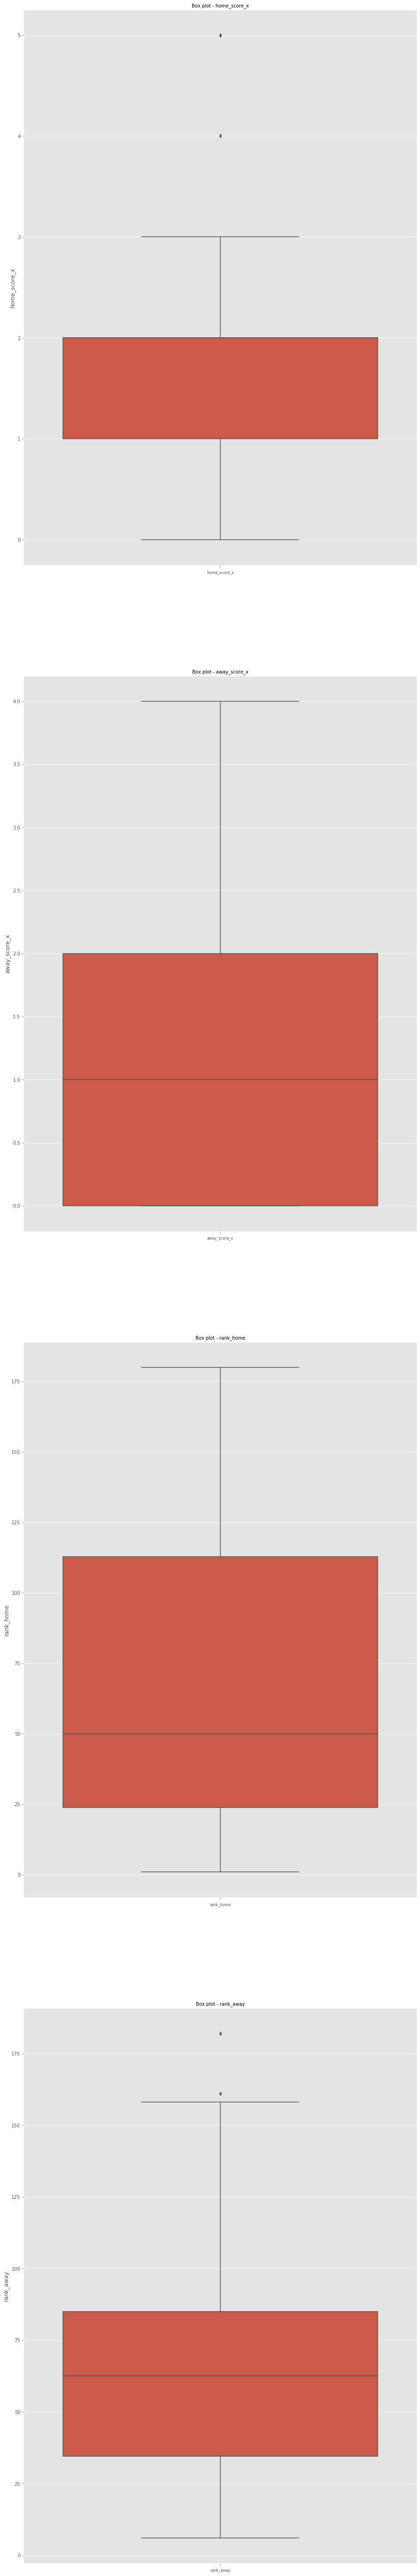

In [181]:
# getting the outliers using boxplots

def plot_boxplots(target_dataframe,col_names):
    fig, ax = plt.subplots(len(col_names), figsize=(15,100))
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)
    plt.show()

#Execute the function
col_names = ['home_score_x', 'away_score_x', 'rank_home', 'rank_away']
target_dataframe = df
plot_boxplots(target_dataframe,col_names)

# *From the  boxplots, it can be seen that both the home score and away score columns have outliers. 
# The outliers are important for modelling, so they will not be dropped

#### Scatterplots

### Distribution of home and away goals

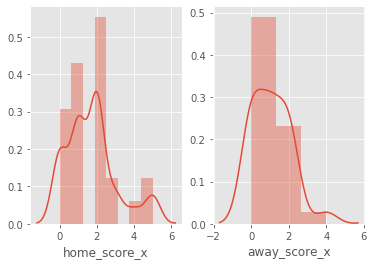

In [184]:
# check the distribution of home and away scores using distplots
# 
f, (ax1, ax2) = plt.subplots(1,2)
sns.distplot(df['home_score_x'], ax=ax1)
sns.distplot(df['away_score_x'], ax=ax2 )
plt.show()

The home and away scores have skewed data. Both are skewed to the right, which means that 

### Total goals scored during games by year

## Approach 1: Using Polynomial regression.
Create a model that can predict how many goals the home team scores

### *Predicting home score*

In [188]:
# Selecting columns relevant to the reasearch question
#
dataset = df[['home_team',	'away_team',	'home_score_x',	'away_score_x',	'tournament_y', 'rank_home', 'rank_away']]

# Previewing the first five rows of the dataset
#
dataset.head()

,home_team,away_team,home_score_x,away_score_x,tournament_y,rank_home,rank_away
0,England,Greece,5.0,0.0,Friendly,15.0,32.0
1,Poland,Austria,3.0,4.0,Friendly,27.0,41.0
2,Brazil,Russia,5.0,1.0,Friendly,1.0,37.0
3,Germany,Netherlands,1.0,1.0,Friendly,3.0,9.0
4,Italy,Spain,2.0,2.0,Friendly,8.0,15.0


#### Checking for multicollinearity
[Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. 

We have perfect multicollinearity if, for example as in the equation above, the correlation between two independent variables is equal to 1 or −1

In [189]:
# Displaying the correlations between the variables
# as home_score_x is the response variable, we do not include it when checking for multicolinearity
corrs = dataset.drop('home_score_x', axis = 1).corr()
corrs

,away_score_x,rank_home,rank_away
away_score_x,1.000000,0.069775,0.033979
rank_home,0.069775,1.000000,0.576712
rank_away,0.033979,0.576712,1.000000


The tabe above shows how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. The correlations have been used to compute the VIF (Variance Inflation Factor) score for each variable.The VIF is created by finding the inverse matrix of the correations matrix using the numpy linlag.inv() function

In [190]:
# Creating a dataframe of the VIF
#
vif_df = pd.DataFrame(np.linalg.inv(corrs.values), index = corrs.index, columns = corrs.columns)
vif_df

,away_score_x,rank_home,rank_away
away_score_x,1.004952,-0.075558,0.009428
rank_home,-0.075558,1.504025,-0.864822
rank_away,0.009428,-0.864822,1.498433


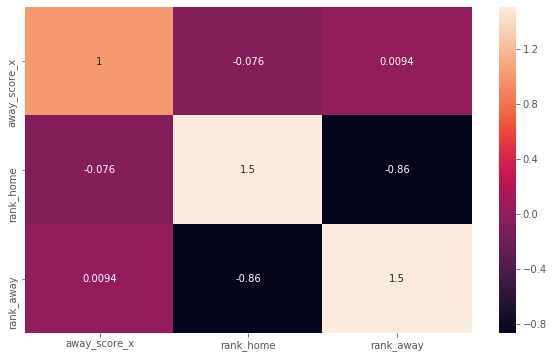

In [191]:
# Creating a heatmap of the vif_df
#
plt.figure(figsize = (10, 6))
sns.heatmap(vif_df, annot = True)
plt.show()

*The VIF score for each variable is found alongside the downwards sloping diagonal.
All of this scores are under 5, therefore there is no multicollinearity*

#### Creating the polynomial model

In [193]:
# Creating X and y variables
#
X = dataset.iloc[:, [0, 1, 3, 4, 5, 6]]
y = dataset.home_score_x

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.5917424558413307


THe RMSE of this model is fairly low i.e 1.5917424558413307, indicating that the model is fairly good. 

#### Hyperparameter tuning to find the optimal parameters for the model

In [194]:
# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is -2.484725172220892 and the best parameters are {'fit_intercept': False, 'normalize': True}


*The optimal parameters for this model are {'fit_intercept': True, 'normalize': False}*

#### Performing cross validation to check for overfitting or underfitting

In [195]:
# Performing cross validation of ten folds
#
scores = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 2.599
Standard deviation of the cross validation scores is 1.751


*From the above mean and standard deviation it can be seen the model is fairly stable, as it varies only by 0.24, from the mean*

#### Checking the appripriateness of the model using a residual plot
A [residual](https://stattrek.com/statistics/dictionary.aspx?definition=residual%20plot) plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

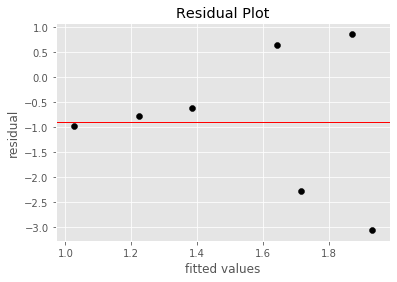

In [196]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

*The residuals are centered around a mean that is very close to 0. It can also be noted that there is no obvious patterns around the plot.  
This shows that the model is fairly good*

#### Heteroskedasticity test using the barlett's test
The concept of [heteroscedasticity](https://www.xlstat.com/en/solutions/features/heteroscedasticity-tests) - the opposite being homoscedasticity - is used in statistics, especially in the context of linear regression or for time series analysis, to describe the case where the variance of errors or the model is not the same for all observations, while often one of the basic assumption in modeling is that the variances are homogeneous and that the errors of the model are identically distributed.



The barlett'stest establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.


If the test_result is greater than the critical value, then the null hypothesis is rejected. This means that there are patterns to the variance of the data

Otherwise, if no patterns are identified, null hypothesis is accepted. This means that the variance is homogeneous across the dataset

In [198]:
# Performing the barlett's test
#
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('The variances are homogeneous')
  print('This means that the variances are equal, hence no need to reasses the model')
  

The test result of 8.84 is less than the critical value of 19.85
The variances are homogeneous
This means that the variances are equal, hence no need to reasses the model


## Approach 2: Using Logistic Regression.
Create a model that can predict whether the home team will win, draw or lose

In [200]:
# Selecting the relevant features for the logistic regression model
#
data = df[['home_team', 'away_team', 'home_score_x', 'away_score_x', 'tournament_x', 'year', 'rank_home', 'rank_away', 'result']]

# Previewing the first five rows of the data
#
data.head()

,home_team,away_team,home_score_x,away_score_x,tournament_x,year,rank_home,rank_away,result
0,England,Greece,5.0,0.0,Friendly,1994,15.0,32.0,W
1,Poland,Austria,3.0,4.0,Friendly,1994,27.0,41.0,L
2,Brazil,Russia,5.0,1.0,Friendly,1998,1.0,37.0,W
3,Germany,Netherlands,1.0,1.0,Friendly,1998,3.0,9.0,D
4,Italy,Spain,2.0,2.0,Friendly,1998,8.0,15.0,D


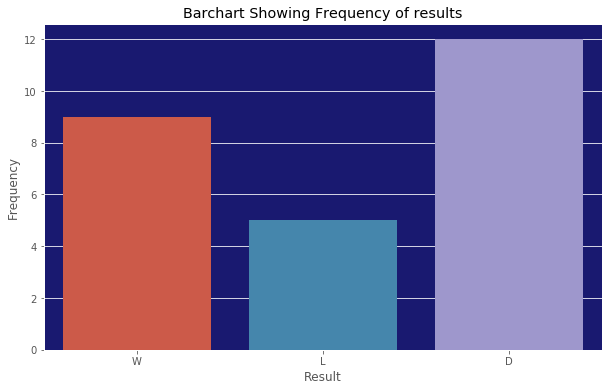

In [201]:
# Checking whether the data is well balanced between all the results; win draw or lose
#
plt.figure(figsize = (10, 6))
ax = sns.countplot(data.result)
ax.set_facecolor('midnightblue')
plt.ylabel('Frequency')
plt.xlabel('Result')
plt.title('Barchart Showing Frequency of results')
plt.show()

*From the above chart, the draw results has the highest frequency, meaning that it has the highest occurence. 

Losses had the least frequency meaning that the losses had the lowest occurrence. 

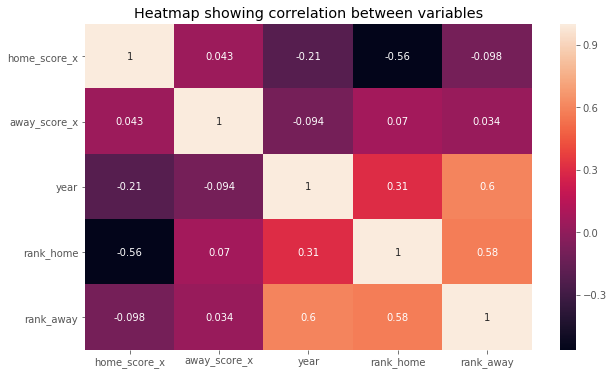

In [202]:
# to check for correlation between the predictor variables
# 
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

There is a negative correlation of -0.56 between the rank of the home team and home team goals. 
THere is a small positive correlation between the rank of the away team and the scores of the away team. 

#### Creating a LogisticRegression model

In [203]:
# Spliting the data into features and the target variable
#
X = data.drop('result', axis = 1)
y = data.result

# Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model
#
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
#
y_pred = logistic.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')
print(f'The f1 score of the model is {f1_score(y_test, y_pred, average = "macro")}')
confusion_matrix(y_test, y_pred)

The accuracy of the model is 0.2857142857142857
The f1 score of the model is 0.2222222222222222


array([[0, 2, 0],
       [1, 0, 0],
       [2, 0, 2]])

*The model above has an accuracy of approximately  20% and an f1_score of approximately 0.22.
The model is clearly underfitting on the training data; further investigation and assessment is needed*

#### Hyperparameter tuning

In [204]:
# Displaying parameters of the logistic regression model that can be tuned
#
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
# Creating a dictioanry of parameters to be tuned
#
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}

logistic = LogisticRegression()

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold, scoring = 'accuracy')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is 0.7 and the best parameters are {'C': 5.0, 'penalty': 'l2'}


*From above, it can observed that the best parameters are {'C': 5.0, 'penalty': 'l2'} which give a score of 0.7*